## **Fuzzy - Exemplo do IMC**
- Baseado em : https://www.abenge.org.br/cobenge/legado/arquivos/5/Artigos/129231.pdf
  - Variáveis de Entrada :
    - Peso : 40 a 120 Kg
    - Altura : 150 a 200 cm
  - Variáveis de Saída :
    - IMC : 16 a 41

- Verificação do calculo com a base do dados.gov : https://dados.gov.br/dados/conjuntos-dados/servico-militar

# Pacotes e Módulos

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.3 MB/s eta 0:00:00


In [2]:
# Importando bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

# Antecedentes e Consequentes

In [3]:
# Variáveis de entrada
peso = ctrl.Antecedent(np.arange(40, 121, 1), 'peso')
altura = ctrl.Antecedent(np.arange(150, 201, 1), 'altura')

In [4]:
# Variável de saída
imc = ctrl.Consequent(np.arange(16, 41, 1), 'imc')

In [5]:
# Funções de pertinência para as variáveis de entrada
peso['leve'] = fuzz.trapmf(peso.universe, [40, 40, 45,60])
peso['medio'] = fuzz.trimf(peso.universe, [50, 65, 80])
peso['alto'] = fuzz.trimf(peso.universe, [70, 85, 100])
peso['muito_alto'] = fuzz.trapmf(peso.universe, [90,105, 120, 120])

altura['baixa'] = fuzz.trapmf(altura.universe, [150, 150, 160, 165])
altura['media'] = fuzz.trimf(altura.universe, [160, 170, 180])
altura['alta'] = fuzz.trimf(altura.universe, [175, 182.5, 190])
altura['muito_alta'] = fuzz.trapmf(altura.universe, [185, 190, 200,200])

# Funções de pertinência para a variável de saída
imc['muito_magro'] = fuzz.trapmf(imc.universe, [16, 16, 17, 17.5])
imc['magro'] = fuzz.trimf(imc.universe, [17, 18, 19])
imc['normal'] = fuzz.trimf(imc.universe, [18.5, 22, 25])
imc['acima_do_peso'] = fuzz.trimf(imc.universe, [24.5, 27.5, 30.5])
imc['obesidade_1'] = fuzz.trimf(imc.universe, [29.5, 33, 36])
imc['obesidade_2'] = fuzz.trimf(imc.universe, [35, 37, 40])
imc['obesidade_3'] = fuzz.trapmf(imc.universe, [38, 39, 41, 41])

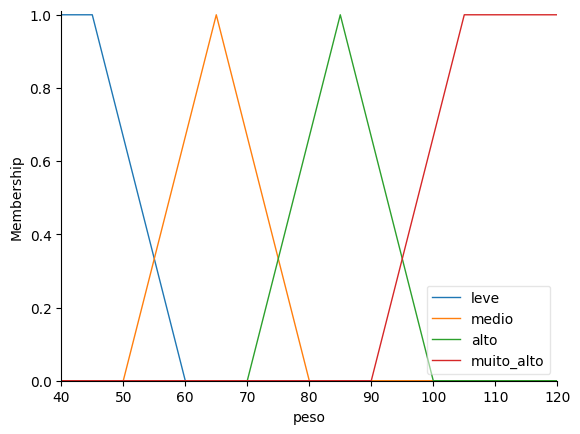

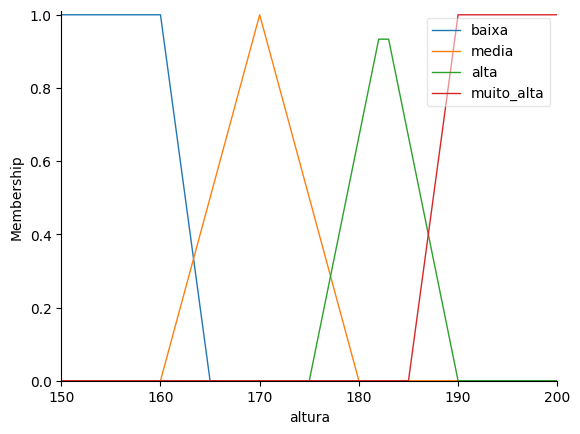

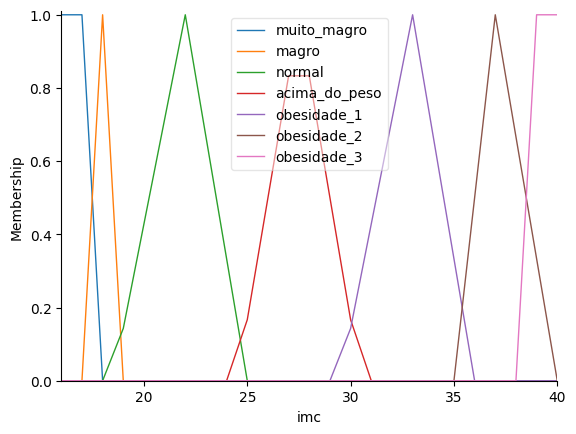

In [6]:
# Visualização das funções de pertinência
peso.view()
altura.view()
imc.view()

# Regras

In [7]:
regra1 = ctrl.Rule(peso['leve'] & altura['baixa'], imc['normal'])
regra2 = ctrl.Rule(peso['leve'] & altura['media'], imc['magro'])
regra3 = ctrl.Rule(peso['leve'] & altura['alta'], imc['muito_magro'])
regra4 = ctrl.Rule(peso['leve'] & altura['muito_alta'], imc['muito_magro'])

regra5 = ctrl.Rule(peso['medio'] & altura['baixa'], imc['acima_do_peso'])
regra6 = ctrl.Rule(peso['medio'] & altura['media'], imc['normal'])
regra7 = ctrl.Rule(peso['medio'] & altura['alta'], imc['magro'])
regra8 = ctrl.Rule(peso['medio'] & altura['muito_alta'], imc['muito_magro'])

regra9 = ctrl.Rule(peso['alto'] & altura['baixa'], imc['obesidade_1'])
regra10 = ctrl.Rule(peso['alto'] & altura['media'], imc['acima_do_peso'])
regra11 = ctrl.Rule(peso['alto'] & altura['alta'], imc['normal'])
regra12 = ctrl.Rule(peso['alto'] & altura['muito_alta'], imc['magro'])

regra13 = ctrl.Rule(peso['muito_alto'] & altura['baixa'], imc['obesidade_2'])
regra14 = ctrl.Rule(peso['muito_alto'] & altura['media'], imc['obesidade_1'])
regra15 = ctrl.Rule(peso['muito_alto'] & altura['alta'], imc['acima_do_peso'])
regra16 = ctrl.Rule(peso['muito_alto'] & altura['muito_alta'], imc['normal'])

In [8]:
sistema_controle = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8,
    regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16
])

# Construindo o Modelo Fuzzy

In [9]:
simulacao = ctrl.ControlSystemSimulation(sistema_controle)

In [10]:
def nivel_linguistico_imc(valor_imc):
    if valor_imc <= 18.5:
        return "Magro"
    elif valor_imc <= 24.9:
        return "Normal"
    elif valor_imc <= 29.9:
        return "Acima do Peso"
    elif valor_imc <= 34.9:
        return "Obesidade Grau 1"
    elif valor_imc <= 39.9:
        return "Obesidade Grau 2"
    else:
        return "Obesidade Grau 3"

# Funcão para calcular IMC

In [11]:
def func_calcular_imc(peso, altura_cm):
    # Convertendo altura de centímetros para metros
    altura = altura_cm / 100
    # Calcula o IMC
    imc = peso / (altura ** 2)
    return imc

# Executando o modelo Fuzzy e comparando com a função

Valor do modelo Fuzzy: 21.10113887727573
Normal
------------------------------------------
Valor da Função: 20.043744845638066
Normal


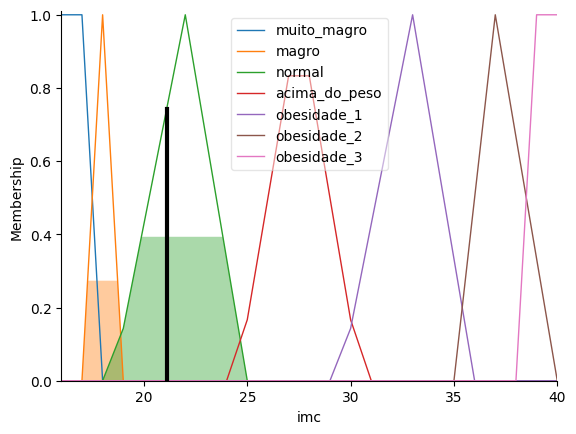

In [12]:
# Entradas
peso = 55.9
altura = 167

simulacao.input['peso'] = peso
simulacao.input['altura'] = altura

# Computa o resultado
simulacao.compute()

# Saída
print("Valor do modelo Fuzzy:", simulacao.output['imc'])
print(nivel_linguistico_imc(simulacao.output['imc']))

print("------------------------------------------")

print("Valor da Função:", func_calcular_imc(peso, altura))
print(nivel_linguistico_imc(func_calcular_imc(peso, altura)))

imc.view(sim=simulacao)

plt.show()

# **Comparação com um Dataset**

# Dataset

In [13]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRUfRB0lW8U10BXTySQQKEWujMRidmPJz7RD0DBIyYfj519nZTmKXDQhugI0Lsq7DxgM2-qod0j6T74/pub?output=csv", sep=",")

In [14]:
df_imc = df.loc['PESO', 'ALTURA']
df_imc_nona = df_imc.dropna()

In [15]:
# Adicionando colunas para os IMCs
df_imc_nona['IMC'] = None
df_imc_nona['IMC_FUZZY'] = None

<ipython-input-15-01652bd94a40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC'] = None
<ipython-input-15-01652bd94a40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC_FUZZY'] = None


# Processando

In [16]:
imcs = []
imcs_fuzzy = []

for indice, linha in df_imc_nona.iterrows():
    print('Indice : ', indice)
    df_peso = linha['PESO']
    df_altura = linha['ALTURA']

    imc = func_calcular_imc(df_peso, df_altura)
    imcs.append(nivel_linguistico_imc(imc))

    simulacao.input['peso'] = df_peso
    simulacao.input['altura'] = df_altura
    simulacao.compute()
    imcs_fuzzy.append(nivel_linguistico_imc(simulacao.output['imc']))


A saída de streaming foi truncada nas últimas 5000 linhas.
Indice :  4994
Indice :  4995
Indice :  4996
Indice :  4997
Indice :  4998
Indice :  4999
Indice :  5000
Indice :  5001
Indice :  5002
Indice :  5003
Indice :  5004
Indice :  5005
Indice :  5006
Indice :  5007
Indice :  5008
Indice :  5009
Indice :  5010
Indice :  5011
Indice :  5012
Indice :  5013
Indice :  5014
Indice :  5015
Indice :  5016
Indice :  5017
Indice :  5018
Indice :  5019
Indice :  5020
Indice :  5021
Indice :  5022
Indice :  5023
Indice :  5024
Indice :  5025
Indice :  5026
Indice :  5027
Indice :  5028
Indice :  5029
Indice :  5030
Indice :  5031
Indice :  5032
Indice :  5033
Indice :  5034
Indice :  5035
Indice :  5036
Indice :  5037
Indice :  5038
Indice :  5039
Indice :  5040
Indice :  5041
Indice :  5042
Indice :  5043
Indice :  5044
Indice :  5045
Indice :  5046
Indice :  5047
Indice :  5048
Indice :  5049
Indice :  5050
Indice :  5051
Indice :  5052
Indice :  5053
Indice :  5054
Indice :  5055
Indice :  5

In [17]:
df_imc_nona['IMC'] = imcs
df_imc_nona['IMC_FUZZY'] = imcs_fuzzy
df_imc_nona.head(20)

<ipython-input-17-4b57f58d7ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC'] = imcs
<ipython-input-17-4b57f58d7ca7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imc_nona['IMC_FUZZY'] = imcs_fuzzy


,PESO,ALTURA,IMC,IMC_FUZZY
0,69.0,176.0,Normal,Normal
1,79.0,181.0,Normal,Normal
2,64.0,165.0,Normal,Normal
3,55.0,180.0,Magro,Magro
4,76.0,186.0,Normal,Normal
5,76.0,184.0,Normal,Normal
6,60.0,165.0,Normal,Normal
7,98.0,184.0,Acima do Peso,Acima do Peso
8,78.0,175.0,Acima do Peso,Acima do Peso
9,80.0,170.0,Acima do Peso,Acima do Peso
